# Anomaly Detection in Time Series Data

## 1. Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

## 2. Load the dataset:

In [4]:
data = pd.read_csv('./ambient_temperature_system_failure.csv', parse_dates=['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


In [5]:
data.describe()

,timestamp,value
count,7267,7267.000000
mean,2013-12-17 01:43:01.477914112,71.242433
min,2013-07-04 00:00:00,57.458406
25%,2013-10-01 13:30:00,68.369411
50%,2013-12-19 04:00:00,71.858493
75%,2014-03-06 01:30:00,74.430958
max,2014-05-28 15:00:00,86.223213
std,NaN,4.247509


There's not any missing values in the dataset.

## 3. Data Prepration:

### 3.1 Normalize value column:

In [6]:
data['value_scaled'] = (data['value'] - data['value'].mean()) / data['value'].std()

## 4. Anomaly Detection Using Z-Score:

In [7]:
data['z_score'] = zscore(data['value'])
data['z_anomaly'] = (data['z_score'].abs() > 3)  # Mark anomalies

In [8]:
data['z_anomaly'].value_counts()

z_anomaly
False    7248
True       19
Name: count, dtype: int64

## 5. Anomaly Detection Using IsolationForest:

In [9]:
model = IsolationForest(contamination=0.05, random_state=42)

In [10]:
data['isolation_forest_pred'] = model.fit_predict(data[['value_scaled']])
data['if_anomaly'] = data['isolation_forest_pred'] == -1  # Mark anomalies

In [11]:
data['if_anomaly'].value_counts()

if_anomaly
False    6903
True      364
Name: count, dtype: int64

Isolation forest has predicted anomalies more than Z-Score anomaly.

## 6. Visualization:

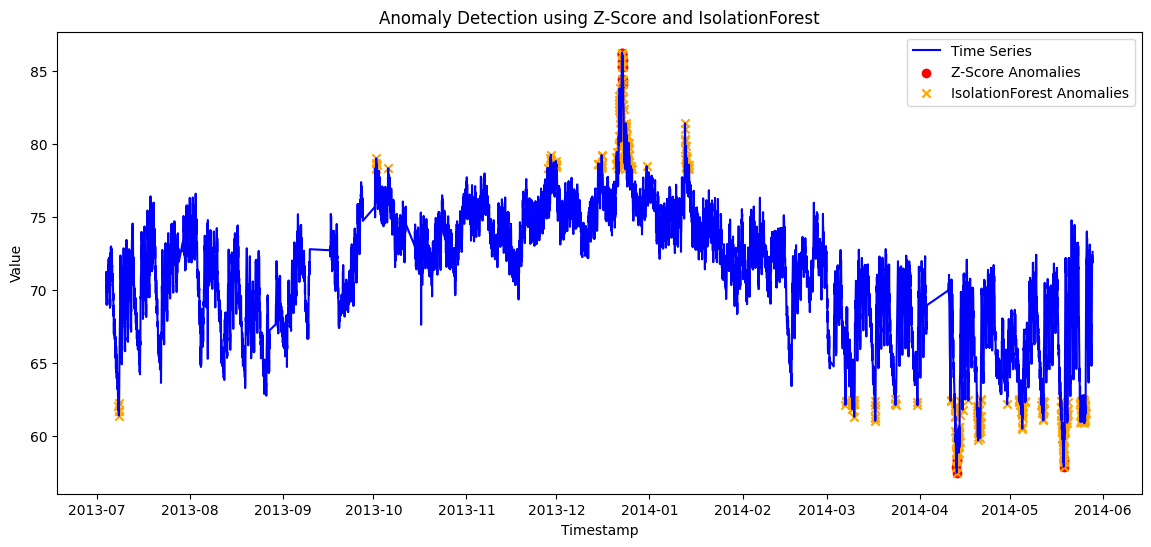

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['value'], label='Time Series', color='blue')
# Highlight Z-score anomalies
plt.scatter(data['timestamp'][data['z_anomaly']], data['value'][data['z_anomaly']],
            color='red', label='Z-Score Anomalies', marker='o')
# Highlight IsolationForest anomalies
plt.scatter(data['timestamp'][data['if_anomaly']], data['value'][data['if_anomaly']],
            color='orange', label='IsolationForest Anomalies', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection using Z-Score and IsolationForest')
plt.show()

Z-score detect very far point only, but the Isolation forest detect more points.

In [13]:
data.to_csv("anomaly_results.csv", index=False)
print("Anomaly detection complete. Results saved as 'anomaly_results.csv'.")

Anomaly detection complete. Results saved as 'anomaly_results.csv'.
